In [19]:
##Importando todas as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, f1_score
from wordcloud import WordCloud

In [2]:
from pyparsing import White
class WordCloudObj:
    def word_cloud(self, text, filename):
        wordcloud = WordCloud(width = 1200, height = 800, max_font_size = 50, margin=0).generate(text)
        plt.figure(figsize=(8, 8))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
        wordcloud.to_file(filename)
        return

In [3]:
#Carregando Dataset
data = pd.read_csv("spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#Descartando colunas indesejadas
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

#Nomeando as colunas
data = data.rename(columns = {'v1':'label', 'v2':'message'})

In [5]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
#Calculando o tamanho das mensagens
data['lenght']=data['message'].apply(len)
data.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
data.describe()

,lenght
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

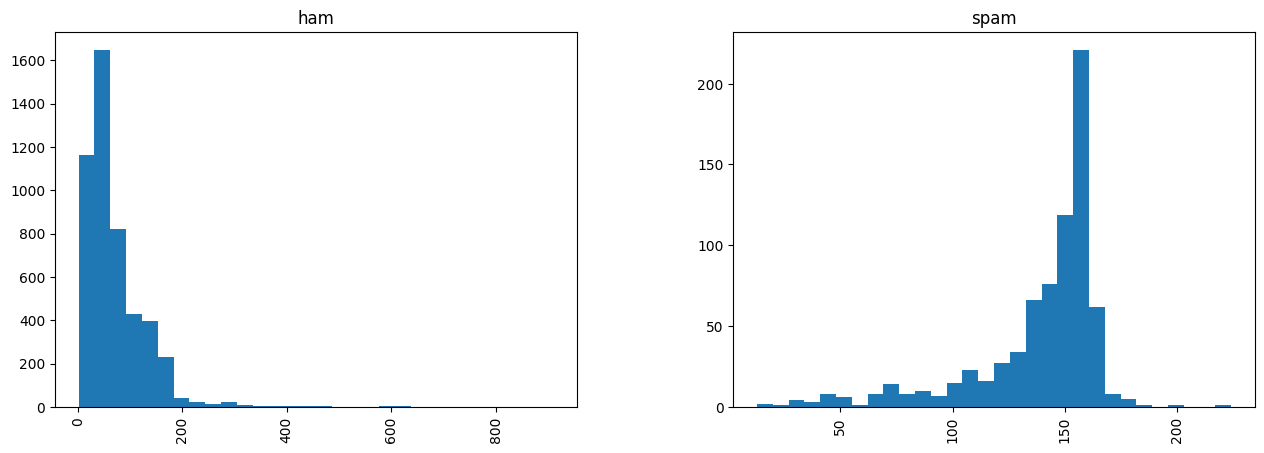

In [9]:
%matplotlib inline

#Trançando o tamanho das mensagens Não Spam e Spam
data.hist(by='label',column='lenght', bins=30, figsize=[15,5])

A partir, deste grafico foi possivel perceber que as mensagens de Spam são mais longas que as que não são.

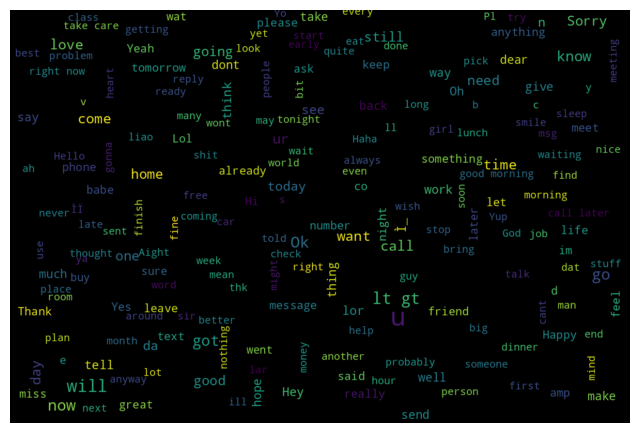

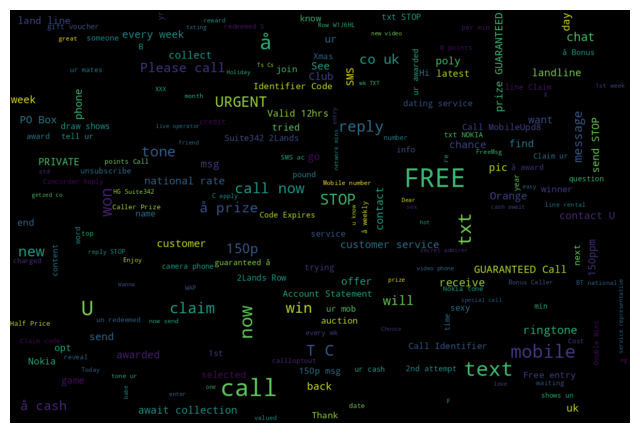

In [10]:
word_cloud_obj = WordCloudObj()
ham_text = " ".join(data[data['label'] == 'ham']['message'])
word_cloud_obj.word_cloud(ham_text, "ham_word_cloud.png")
spam_text = " ".join(data[data['label'] == 'spam']['message'])
word_cloud_obj.word_cloud(spam_text, "spam_word_cloud.png")

Foi possivel observar as palavras que aparece com mais frequeência: Não Spam x Spam

In [11]:
#Convertendo os rotulos em rotulos numerico
# ham = 0 e spam = 1
data['label_num']=data.label.map({'ham':0,'spam':1})
data.head()

,label,message,lenght,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [12]:
#Carregando os recursos e alvos para treinar
x = data.message
y = data.label_num

In [13]:
#Temos 5572 rotulos para 5572 recursos
#75% de teste; 25% de treinamento
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11)

In [14]:
vect = CountVectorizer()
#Convertendo feições em vetor numerico
X_train = vect.fit_transform(x_train)
#Convertendo o alvo para vetor numerico
X_test = vect.transform(x_test)

In [15]:
#Carregando todos os classificadores
svc = SVC(kernel = 'linear')
mnb = MultinomialNB(alpha=0.2)
gnb = GaussianNB()
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
abc = AdaBoostClassifier(n_estimators=100, random_state=11)

In [16]:
#Definindo as funções para o treinamento e teste

def training(clf,x_train,Y_train):
  clf.fit(x_train,Y_train)

#Função para prever os rotulos

def predict(clf,X_test):
  return clf.predict(X_test)

In [17]:
#Definindo um dicionário de classificador
classifier={'SVM': svc, 'MultinomialNB': mnb, 'GaussianNB':  gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc}

In [20]:
#Prever e armazenar a pontuação de cada classificador
score = []
for n,c in classifier.items():
  training(c,X_train.toarray(),y_train)
  pred = predict(c,X_test.toarray())
  score.append((n, accuracy_score(y_test, pred), recall_score(y_test, pred), f1_score(y_test, pred)))

In [21]:
score_df = pd.DataFrame(score, columns=['Classificador', 'Scores', 'Recall', 'F1'])

score_df['Scores'] = score_df['Scores'].apply(lambda x: '{:.2%}'.format(x))
score_df['Recall'] = score_df['Recall'].apply(lambda x: '{:.2%}'.format(x))
score_df['F1'] = score_df['F1'].apply(lambda x: '{:.2%}'.format(x))

score_df

,Classificador,Scores,Recall,F1
0,SVM,98.92%,91.52%,95.27%
1,MultinomialNB,98.85%,95.15%,95.15%
2,GaussianNB,89.81%,93.33%,68.44%
3,logistic,98.71%,92.12%,94.41%
4,RandomForest,98.56%,87.88%,93.55%
5,Adaboost,98.78%,90.30%,94.60%


REFERENCIAS:


*   https://github.com/rajatdv/sms_spam_detection
*  https://github.com/Sumit-Rakesh/Email-Spam-Detection-classification-project-in-python

